The idea is to do random patches but try out different methodologies regarding the sampling procedure. First, in the form of weighted samples where ideas from Breiman's Paper (pasting) and Adaboost can be used.
Second, in the form of weighted features with respect to correlation (chi square, best of k?) between the selected samples?

- [Link to breiman Paper](https://link.springer.com/content/pdf/10.1023%2FA%3A1007563306331.pdf)
- [Link to Louppe Paper](https://orbi.uliege.be/bitstream/2268/130099/1/glouppe12.pdf)

Some more similar ideas:
-  use for each new estimator the n1 closest from the same class and the n2 closest from other classes. if the average distance between the sample and the same-class samples is bigger than the avg.distance with the other-class samples, do not take it into account and say it's an outlier? n1 and n2 should be trained probably?
- Based on the above, maybe pick the largest possible linearly separable dataset for this sample?
- idea of linearly separable classifiers? do we need one good and create multiple linear for the misclassifier samples or go directly for multiple classifiers?

In [1]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from brew.base import Ensemble, EnsembleClassifier
from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier
from brew.combination.combiner import Combiner
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from mlxtend.data import wine_data, iris_data

from mlxtend.plotting import plot_decision_regions


from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.ensemble import ExtraTreesClassifier
from itertools import combinations
import random
random.seed(10)




X, y = wine_data()


knn = KNeighborsClassifier()
bagging = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)

print("KNN Score:")
print(cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean())
print("Bagging Score:")
print(cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean())




/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNN Score:
0.6860213995508112
Bagging Score:
0.9282110682110682


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


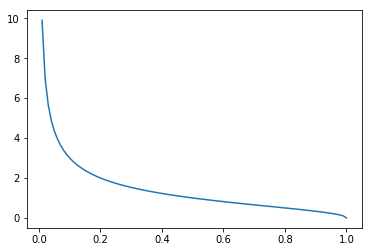

In [2]:
import matplotlib.pyplot as plt
import numpy

x = numpy.linspace(0,1,100) # 100 linearly spaced numbers
yy = np.exp(0.5*np.log((1-x)/x)) # computing the values of sin(x)/x

# compose plot
plt.plot(x,yy) # sin(x)/x
#plt.plot(x,yy,'co') # same function with cyan dots
plt.show() # show the plot

In [4]:
print(a)
print(signs[0])
print(np.exp(-a*signs[0]))
print(signs[4])
print(np.exp(-a*signs[4]))

NameError: name 'a' is not defined

In [5]:
knn.fit(X,y)
preds2 = knn.predict(X)
sc = 1-accuracy_score(y,preds2, normalize=True)
print(sc)
a = 0.5*np.log((1-sc)/float(sc))
print(a)
signs = sign(y, preds2)
#print(signs)
temp =np.array([1/float(len(y)) for i in y])*np.exp(-a*signs)
print(temp)
print(temp/sum(temp))
for i, sign_ in enumerate(signs):
    if sign_ <0:
        pass
        #print("DIFFERENT")
        #print(y[i], preds2[i])
        #print(np.mean(temp), temp[i])
    elif sign_ >0:
        pass
        #print("SAME")
        #print(y[i], preds2[i])
        #print(np.mean(temp), temp[i])

0.2134831460674157
0.6520281314414593


NameError: name 'sign' is not defined

In [6]:
ssign = np.ones_like(preds)
ssign[np.where(preds!=y)] = -1
ssign

NameError: name 'preds' is not defined

In [7]:
#rp2.fit(X,y)
preds = rp2.predict(X)
rp2.samples_weights[-1][np.argsort(rp2.samples_weights[-1]).flatten()]
#for i, y_ in enumerate(preds):
    #print("%d -- %d" % (y_, y[i]))
    #print(rp2.samples_weights[-1][i])

NameError: name 'rp2' is not defined

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import check_X_y, column_or_1d, check_random_state
from sklearn.utils.multiclass import check_classification_targets
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state, check_X_y, check_array, column_or_1d
from sklearn.utils.random import sample_without_replacement
from sklearn.utils.validation import has_fit_parameter, check_is_fitted
from sklearn.utils import indices_to_mask, check_consistent_length
from sklearn.utils.metaestimators import if_delegate_has_method
from sklearn.utils.multiclass import check_classification_targets



def _generate_indices(random_state, bootstrap, n_population, n_samples, prob= None):
    """Draw randomly sampled indices."""
    # Draw sample indices
    if np.all(prob)!=None:
        #print(prob.shape)
        #print(prob)
        indices = random_state.choice([i for i in xrange(0, n_population)], n_samples, p=prob)
    else:
        if bootstrap:
            #print(random_state)
            #print(n_population, n_samples)
            indices = random_state.randint(0, n_population, n_samples)
        else:
            indices = sample_without_replacement(n_population, n_samples,
                                                 random_state=random_state)

    return indices


def generate_bagging_indices(random_state, bootstrap_features,
                              bootstrap_samples, n_features, n_samples,
                              max_features, max_samples, samples_weights):
    """Randomly draw feature and sample indices."""
    # Get valid random state
    random_state = check_random_state(random_state)

    # Draw indices
    #print(random_state, type(random_state))
    
    feature_indices = _generate_indices(random_state, bootstrap_features,
                                        n_features, max_features)
    #print(bootstrap_samples, n_samples, max_samples, samples_weights)
    sample_indices = _generate_indices(random_state, bootstrap_samples,
                                       n_samples, max_samples, prob=samples_weights)

    return feature_indices, sample_indices



def sign(true, preds):
    ssign = np.ones_like(true)
    ssign[np.where(preds!=true)] = -1
    return ssign

class Vanilla_RP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, 
                 base_estimator_=KNeighborsClassifier(),
                 n_estimators=10,
                 max_samples=1.0,
                 max_features=1.0,
                 bootstrap_samples=True,
                 bootstrap_features = False,
                 patcher='random',
                 dev_set=0.1,
                 random_state=42):
        self.base_estimator_ = base_estimator_
        self.n_estimators= n_estimators
        self.max_samples = max_samples
        self.max_features = max_features
        self.bootstrap_samples = bootstrap_samples
        self.bootstrap_features = bootstrap_features
        self.patcher = patcher
        self.dev_set = 0.1
        self.random_state = check_random_state(random_state)
        self.ensemble = []
        self.prev_samples_indices = []
        self.estimators_features = []
        self.samples_weights = []
        self.samples_times_selected = None
        self.scores = []
        self.a = 0
        self.X_dev = None
        self.y_dev = None

    
    def fit(self, X, y):
        
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        #print(y)
        #print(type(y), y.shape)
        #print(X.shape)
        #X, self.X_dev, y, self.y_dev = train_test_split(X, y, test_size=self.dev_set, stratify=y)
        n_samples, self.n_features_ = X.shape
        self._n_samples = n_samples
        self.samples_times_selected = np.zeros_like(y)
        self.default_sample_weight = 1/float(X.shape[0])
        self.max_samples = int(self.max_samples*self._n_samples)
        self.max_features = int(self.max_features*self.n_features_)
        
        y = self._validate_y(y)
        for i_est in xrange(self.n_estimators):
            estimator = clone(self.base_estimator_)
            if self.patcher == 'random':
                features_indices, samples_indices = generate_bagging_indices(
                    self.random_state, self.bootstrap_features,
                              self.bootstrap_samples, X.shape[1], X.shape[0],
                              self.max_features, self.max_samples, [None])
            elif self.patcher == 'weighted':
#                 X_train, X_dev, y_train, y_dev = train_test_split(X, y, stratify = True,
#                                                                    test_size=self.dev_set, 
#                                                                    random_state=self.random_state)
                if i_est==0:
                    self.samples_weights.append(np.array([self.default_sample_weight for i in xrange(X.shape[0])]))
                    self.scores.append(1)
                    signs = np.ones_like(y)
                else:
                    signs = self.update_weights(X, y)
                #print("ROUND %d"%i_est)
                #print(self.samples_weights[i_est])
                #print("INDEX %d" % i)
                #print(self.samples_weights[i_est])
                features_indices, samples_indices = generate_bagging_indices(
                    self.random_state, self.bootstrap_features,
                              self.bootstrap_samples, X.shape[1], X.shape[0],
                              self.max_features, self.max_samples, self.samples_weights[i_est])
                # print("ROUND %d" % i_est)
                # print("SCORE %0.3f"%(self.scores[-1]))
                if i_est != 0:
                    accs = []
                    accs_last = []
                    overlaps = []
                    accs_total = []
                    for jj, ens in enumerate(self.ensemble):
                        # print(len(self.prev_samples_indices), len(self.estimators_features))
                        p_pred = ens.predict(X[self.prev_samples_indices[jj]][:, self.estimators_features[jj]])
                        last_pred = ens.predict(X[self.prev_samples_indices[-1]][:, self.estimators_features[jj]])
                        total_pred = self.predict(X[self.prev_samples_indices[jj]])
                        accs.append(1-accuracy_score(y[self.prev_samples_indices[jj]], p_pred, normalize=True))
                        accs_last.append(1-accuracy_score(y[self.prev_samples_indices[-1]], last_pred, normalize=True))
                        accs_total.append(1-accuracy_score(y[self.prev_samples_indices[jj]], total_pred, normalize=True))
                    #try:
                        #    self.ensemble[jj+1]
                        #except IndexError:
                        #    print("CURRENT")
                        #    print(self.prev_samples_indices[jj])
                        #    print("LAST")
                        #    print(self.prev_samples_indices[-1])
                        #    print(np.array_equal(self.prev_samples_indices[jj], self.prev_samples_indices[-1]))
                        #    print(np.intersect1d(self.prev_samples_indices[jj], self.prev_samples_indices[-1]).shape[0], self.prev_samples_indices[-1].shape[0], self.prev_samples_indices[jj].shape[0])
                        overlaps.append(np.intersect1d(self.prev_samples_indices[jj], self.prev_samples_indices[-1]).shape[0]/float(np.unique(self.prev_samples_indices[jj]).shape[0]))
                    accs = np.round(100*np.array(accs),3)
                    accs_last = np.round(100*np.array(accs_last),3)
                    overlaps = np.round(100*np.array(overlaps),3)
                    accs_total = np.round(100*np.array(accs_total),3)
#                     print("PREVIOUS ERRORS ON CORRESPONDING DATA")
#                     print(accs)
#                     print("ERRORS OF THE ENSEMBLE ON CORRESPONDING DATA")
#                     print(accs_total)
#                     print("PREVIOUS ERRORS ON LAST SELECTED DATA")
#                     print(accs_last)
#                     print("OVERLAPS")
#                     print(overlaps)
#                 print("a: %0.3f"%self.a)
#                 print("WEIGHTS")
#                 print(np.min(self.samples_weights[-1]), 
#                       np.mean(self.samples_weights[-1]), 
#                       np.max(self.samples_weights[-1]))
#                 #print(self.samples_weights[-1])
#                 print("SAMPLED INSTANCES")
#                 print(self.samples_weights[-1][samples_indices])
#                 print(signs[samples_indices])
#                 print(y[samples_indices])
#                 print("~"*50)
            else:
                print("UNSUPPORTED WAY OF PATCHING: %s !" % self.patcher)
            # minor fix for when one class is not represented during sampling
            #print(samples_indices.shape)
            samples_indices = self.fix_class_indices(y, samples_indices)
            #print("AFTER")
            #print(samples_indices.shape)
            estimator.fit(X[samples_indices][:, features_indices], y[samples_indices])
            self.prev_samples_indices.append(samples_indices)
            self.estimators_features.append(features_indices)
            self.ensemble.append(estimator)
            self.samples_times_selected[samples_indices] += 1
        return self
    
    def fix_class_indices(self, y, samples_indices):
        in_set = set(y[samples_indices])
        a = set(y).difference(in_set)
        for item in a:
           samples_indices= np.append(samples_indices, [np.where(y==item)[0][0]])
        return samples_indices
    
    def update_weights(self, X, y): 
        #print("REMOVED %d" % np.where(self.samples_times_selected > 3)[0].shape[0])
        #self.samples_weights[-1][np.where(self.samples_times_selected > 3)] = self.default_sample_weight
        #self.samples_times_selected[np.where(self.samples_times_selected > 3)] = 0
        preds = self.predict(X)
        self.scores.append(1-accuracy_score(y, preds, normalize=True)+0.0001)
        self.a = 0.5*np.log((1-self.scores[-1])/float(self.scores[-1]))
        #self.a = 9
        #self.a = 1
        signs = sign(y, preds)
        temp = self.samples_weights[-1]*np.exp(-self.a*signs)
            
        #print("MEAN")
        #print(np.mean(temp))
        #print(temp[np.where(signs<0)])
        self.samples_weights.append(temp/np.sum(temp))
        preds = np.ones((X.shape[0], len(self.ensemble)))
        for ii, est in enumerate(self.ensemble):
            sc = accuracy_score(y, est.predict(X[:, self.estimators_features[ii]]), normalize=True)
            preds[:, ii] = sc*sign(y, est.predict(X[:, self.estimators_features[ii]]))
        #print("INITIAL")
        #print(preds)
        #print(np.min(preds))
        #print("AFTER COLLAPSE")
        preds = np.sum(preds, axis=1)
        #print(preds)
        #print("AFTER RESHAPE")
        preds = preds.reshape(-1,)
        #print(preds)
        if np.any(preds<0):
            min_ = np.min(preds)
            if min_ < 0:
                min_ = -1*min_
            #print("MIN")
            #print(min_)
            preds = preds + min_ + 0.001
        #else:
            #preds = preds - np.min(preds) + 0.001
        #print("AFTER_MIN")
        #print(preds)
        #print("AFTER NORMALIZATION")
        preds /= np.sum(preds)
        #print(preds)
        #print(preds)
        #print(np.sum(preds))
        self.samples_weights.append(preds)
        return signs
    
    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        return y
    
    def predict(self, X):
        """Predict class for X.
        The predicted class of an input sample is computed as the class with
        the highest mean predicted probability. If base estimators do not
        implement a ``predict_proba`` method, then it resorts to voting.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
    
        if hasattr(self.base_estimator_, "predict_proba"):
            predicted_probability = self.predict_proba(X)
            return self.classes_.take((np.argmax(predicted_probability, axis=1)),
                                  axis=0)
        else:
            predicted_probability = np.zeros((X.shape[0],1))
            for i, ens in enumerate(self.ensemble):
                predicted_probability = np.hstack((predicted_probability, ens.predict(X[:, self.estimators_features[i]]).reshape(-1,1)))
            predicted_probability = np.delete(predicted_probability,0,axis=1)
            final_pred = []
            for sample in xrange(X.shape[0]):
                final_pred.append(most_common(predicted_probability[sample,:]))
                #votes = []
                #for i, mod_vote in predictions[sample,:]:
                #    votes.extend([predictions[sample, i] for j in xrange(int(self.acc[i]))])
                #final_pred = most_common(votes)
            return np.array(final_pred)   
  


    def predict_proba(self, X):
        """Predict class probabilities for X.
        The predicted class probabilities of an input sample is computed as
        the mean predicted class probabilities of the base estimators in the
        ensemble. If base estimators do not implement a ``predict_proba``
        method, then it resorts to voting and the predicted class probabilities
        of an input sample represents the proportion of estimators predicting
        each class.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        p : array of shape = [n_samples, n_classes]
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, "classes_")
        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1}."
                             "".format(self.n_features_, X.shape[1]))

        all_proba = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_proba += ens.predict_proba(X[:, self.estimators_features[i]])
        all_proba /= self.n_estimators
        #print(all_proba.shape)
        #print(all_proba)
        #proba = np.sum(all_proba, axis=0) / self.n_estimators
        #print(proba.shape)
        #print(proba)
        return all_proba


    @if_delegate_has_method(delegate='base_estimator')
    def decision_function(self, X):
        """Average of the decision functions of the base classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The columns correspond
            to the classes in sorted order, as they appear in the attribute
            ``classes_``. Regression and binary classification are special
            cases with ``k == 1``, otherwise ``k==n_classes``.
        """
        check_is_fitted(self, "classes_")

        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1} "
                             "".format(self.n_features_, X.shape[1]))
        all_decisions = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_decisions += ens.predict_proba(X[:, self.estimators_features[i]]) 
        decisions = sum(all_decisions) / self.n_estimators

        return decisions

        
    

        
        
def most_common(lst):
    if isinstance(lst, np.ndarray):
        lst = lst.tolist()
    #print(lst, max(set(lst), key=lst.count)  )
    return max(set(lst), key=lst.count)                     
        
        

In [ ]:
min(min(np.array([[1,2]])))

In [9]:
#X, y = wine_data()
rp2 = Vanilla_RP(knn,max_samples=0.5, max_features=0.5, patcher='weighted')
rp2.fit(X,y)

#train_test_split(X,y,test_size=0.2, stratify=y)

Vanilla_RP(base_estimator_=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
      bootstrap_features=False, bootstrap_samples=True, dev_set=0.1,
      max_features=6, max_samples=89, n_estimators=10, patcher='weighted',
      random_state=<mtrand.RandomState object at 0x7f624c5507d0>)

In [13]:
knn = KNeighborsClassifier()
bagging = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)
rp = Vanilla_RP(knn,max_samples=0.5, max_features=0.5)
rp2 = Vanilla_RP(knn,max_samples=0.5, max_features=0.5, patcher='weighted')
cv = 10
print("KNN Score:")
print(cross_val_score(knn, X, y, cv=cv, n_jobs=-1).mean())
print("Bagging Score:")
print(cross_val_score(bagging, X, y, cv=cv, n_jobs=-1).mean())
print("RP Score:")
print(cross_val_score(rp, X, y, cv=cv, n_jobs=-1).mean())
print("RP-WEIGHTED Score:")
print(cross_val_score(rp2, X, y, cv=cv, n_jobs=-1).mean())


KNN Score:
0.6757739938080495
Bagging Score:
0.9444100447196423
RP Score:
0.9400584795321638
RP-WEIGHTED Score:
0.9213837289301685


In [14]:

"""Bagging meta-estimator."""

# Author: Gilles Louppe <g.louppe@gmail.com>
# License: BSD 3 clause

from __future__ import division

import itertools
import numbers
import numpy as np
from warnings import warn
from abc import ABCMeta, abstractmethod

from sklearn.base import ClassifierMixin, RegressorMixin
from sklearn.externals.joblib import Parallel, delayed
from sklearn.externals.six import with_metaclass
from sklearn.externals.six.moves import zip
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import check_random_state, check_X_y, check_array, column_or_1d
from sklearn.utils.random import sample_without_replacement
from sklearn.utils.validation import has_fit_parameter, check_is_fitted
from sklearn.utils import indices_to_mask, check_consistent_length
from sklearn.utils.metaestimators import if_delegate_has_method
from sklearn.utils.multiclass import check_classification_targets

from sklearn.base import BaseEnsemble, _partition_estimators


__all__ = ["BaggingClassifier",
           "BaggingRegressor"]

MAX_INT = np.iinfo(np.int32).max


def _generate_indices(random_state, bootstrap, n_population, n_samples, prob= None):
    """Draw randomly sampled indices."""
    # Draw sample indices
    if prob:
        indices = random_state.choice([i for i in xrange(0, n_population)], n_samples, p=prob)
    else:
        if bootstrap:
            indices = random_state.randint(0, n_population, n_samples)
        else:
            indices = sample_without_replacement(n_population, n_samples,
                                                 random_state=random_state)

    return indices


def _generate_bagging_indices(random_state, bootstrap_features,
                              bootstrap_samples, n_features, n_samples,
                              max_features, max_samples):
    """Randomly draw feature and sample indices."""
    # Get valid random state
    random_state = check_random_state(random_state)

    # Draw indices
    feature_indices = _generate_indices(random_state, bootstrap_features,
                                        n_features, max_features)
    sample_indices = _generate_indices(random_state, bootstrap_samples,
                                       n_samples, max_samples)

    return feature_indices, sample_indices

def sign_()

def _parallel_build_estimators(n_estimators, ensemble, X, y, sample_weight,
                               seeds, total_n_estimators, verbose, sample_weights):
    """Private function used to build a batch of estimators within a job."""
    # Retrieve settings
    n_samples, n_features = X.shape
    max_features = ensemble._max_features
    max_samples = ensemble._max_samples
    bootstrap = ensemble.bootstrap
    bootstrap_features = ensemble.bootstrap_features
    support_sample_weight = has_fit_parameter(ensemble.base_estimator_,
                                              "sample_weight")
    if not support_sample_weight and sample_weight is not None:
        raise ValueError("The base estimator doesn't support sample weight")

    # Build estimators
    estimators = []
    estimators_features = []

    for i in range(n_estimators):
        if verbose > 1:
            print("Building estimator %d of %d for this parallel run "
                  "(total %d)..." % (i + 1, n_estimators, total_n_estimators))

        random_state = np.random.RandomState(seeds[i])
        estimator = ensemble._make_estimator(append=False,
                                             random_state=random_state)

        # Draw random feature, sample indices
        a = 0.5*np.log((1-self.oob_score_)/self.oob_score_)
        sample_weights =
        features, indices = _generate_bagging_indices(random_state,
                                                      bootstrap_features,
                                                      bootstrap, n_features,
                                                      n_samples, max_features,
                                                      max_samples, prob=sample_weights)

        # Draw samples, using sample weights, and then fit
        if support_sample_weight:
            if sample_weight is None:
                curr_sample_weight = np.ones((n_samples,))
            else:
                curr_sample_weight = sample_weight.copy()

            if bootstrap:
                sample_counts = np.bincount(indices, minlength=n_samples)
                curr_sample_weight *= sample_counts
            else:
                not_indices_mask = ~indices_to_mask(indices, n_samples)
                curr_sample_weight[not_indices_mask] = 0

            estimator.fit(X[:, features], y, sample_weight=curr_sample_weight)

        # Draw samples, using a mask, and then fit
        else:
            estimator.fit((X[indices])[:, features], y[indices])

        estimators.append(estimator)
        estimators_features.append(features)

    return estimators, estimators_features


def _parallel_predict_proba(estimators, estimators_features, X, n_classes):
    """Private function used to compute (proba-)predictions within a job."""
    n_samples = X.shape[0]
    p_parallel_predict_probaroba = np.zeros((n_samples, n_classes))

    for estimator, features in zip(estimators, estimators_features):
        if hasattr(estimator, "predict_proba"):
            proba_estimator = estimator.predict_proba(X[:, features])

            if n_classes == len(estimator.classes_):
                proba += proba_estimator

            else:
                proba[:, estimator.classes_] += \
                    proba_estimator[:, range(len(estimator.classes_))]

        else:
            # Resort to voting
            predictions = estimator.predict(X[:, features])

            for i in range(n_samples):
                proba[i, predictions[i]] += 1

    return proba


def _parallel_predict_log_proba(estimators, estimators_features, X, n_classes):
    """Private function used to compute log probabilities within a job."""
    n_samples = X.shape[0]
    log_proba = np.empty((n_samples, n_classes))
    log_proba.fill(-np.inf)
    all_classes = np.arange(n_classes, dtype=np.int)

    for estimator, features in zip(estimators, estimators_features):
        log_proba_estimator = estimator.predict_log_proba(X[:, features])

        if n_classes == len(estimator.classes_):
            log_proba = np.logaddexp(log_proba, log_proba_estimator)

        else:
            log_proba[:, estimator.classes_] = np.logaddexp(
                log_proba[:, estimator.classes_],
                log_proba_estimator[:, range(len(estimator.classes_))])

            missing = np.setdiff1d(all_classes, estimator.classes_)
            log_proba[:, missing] = np.logaddexp(log_proba[:, missing],
                                                 -np.inf)

    return log_proba


def _parallel_decision_function(estimators, estimators_features, X):
    """Private function used to compute decisions within a job."""
    return sum(estimator.decision_function(X[:, features])
               for estimator, features in zip(estimators,
                                              estimators_features))


def _parallel_predict_regression(estimators, estimators_features, X):
    """Private function used to compute predictions within a job."""
    return sum(estimator.predict(X[:, features])
               for estimator, features in zip(estimators,
                                              estimators_features))


class BaseBagging(with_metaclass(ABCMeta, BaseEnsemble)):
    """Base class for Bagging meta-estimator.
    Warning: This class should not be used directly. Use derived classes
    instead.
    """

    @abstractmethod
    def __init__(self,
                 base_estimator=None,
                 n_estimators=10,
                 max_samples=1.0,
                 max_features=1.0,
                 bootstrap=True,
                 bootstrap_features=False,
                 oob_score=False,
                 warm_start=False,
                 n_jobs=1,
                 random_state=None,
                 verbose=0):
        super(BaseBagging, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators)

        self.max_samples = max_samples
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.bootstrap_features = bootstrap_features
        self.oob_score = oob_score
        self.warm_start = warm_start
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.verbose = verbose
        self.samples_weights = None 

    def fit(self, X, y, sample_weight=None):
        """Build a Bagging ensemble of estimators from the training
           set (X, y).
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        y : array-like, shape = [n_samples]
            The target values (class labels in classification, real numbers in
            regression).
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
            Note that this is supported only if the base estimator supports
            sample weighting.
        Returns
        -------
        self : object
            Returns self.
        """
        return self._fit(X, y, self.max_samples, sample_weight=sample_weight)

    def _fit(self, X, y, max_samples=None, max_depth=None, sample_weight=None):
        """Build a Bagging ensemble of estimators from the training
           set (X, y).
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        y : array-like, shape = [n_samples]
            The target values (class labels in classification, real numbers in
            regression).
        max_samples : int or float, optional (default=None)
            Argument to use instead of self.max_samples.
        max_depth : int, optional (default=None)
            Override value used when constructing base estimator. Only
            supported if the base estimator has a max_depth parameter.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
            Note that this is supported only if the base estimator supports
            sample weighting.
        Returns
        -------
        self : object
            Returns self.
        """
        random_state = check_random_state(self.random_state)

        # Convert data
        X, y = check_X_y(X, y, ['csr', 'csc'])
        if sample_weight is not None:
            sample_weight = check_array(sample_weight, ensure_2d=False)
            check_consistent_length(y, sample_weight)

        # Remap output
        n_samples, self.n_features_ = X.shape
        self._n_samples = n_samples
        self.samples_weights = np.array([1/float(n_samples) for i in xrange(n_samples)])
        y = self._validate_y(y)

        # Check parameters
        self._validate_estimator()

        if max_depth is not None:
            self.base_estimator_.max_depth = max_depth

        # Validate max_samples
        if max_samples is None:
            max_samples = self.max_samples
        elif not isinstance(max_samples, (numbers.Integral, np.integer)):
            max_samples = int(max_samples * X.shape[0])

        if not (0 < max_samples <= X.shape[0]):
            raise ValueError("max_samples must be in (0, n_samples]")

        # Store validated integer row sampling value
        self._max_samples = max_samples

        # Validate max_features
        if isinstance(self.max_features, (numbers.Integral, np.integer)):
            max_features = self.max_features
        else:  # float
            max_features = int(self.max_features * self.n_features_)

        if not (0 < max_features <= self.n_features_):
            raise ValueError("max_features must be in (0, n_features]")

        # Store validated integer feature sampling value
        self._max_features = max_features

        # Other checks
        if not self.bootstrap and self.oob_score:
            raise ValueError("Out of bag estimation only available"
                             " if bootstrap=True")

        if self.warm_start and self.oob_score:
            raise ValueError("Out of bag estimate only available"
                             " if warm_start=False")

        if hasattr(self, "oob_score_") and self.warm_start:
            del self.oob_score_

        if not self.warm_start or not hasattr(self, 'estimators_'):
            # Free allocated memory, if any
            self.estimators_ = []
            self.estimators_features_ = []

        n_more_estimators = self.n_estimators - len(self.estimators_)

        if n_more_estimators < 0:
            raise ValueError('n_estimators=%d must be larger or equal to '
                             'len(estimators_)=%d when warm_start==True'
                             % (self.n_estimators, len(self.estimators_)))

        elif n_more_estimators == 0:
            warn("Warm-start fitting without increasing n_estimators does not "
                 "fit new trees.")
            return self

        # Parallel loop
        n_jobs, n_estimators, starts = _partition_estimators(n_more_estimators,
                                                             self.n_jobs)
        total_n_estimators = sum(n_estimators)

        # Advance random state to state after training
        # the first n_estimators
        if self.warm_start and len(self.estimators_) > 0:
            random_state.randint(MAX_INT, size=len(self.estimators_))

        seeds = random_state.randint(MAX_INT, size=n_more_estimators)
        self._seeds = seeds

        all_results = Parallel(n_jobs=n_jobs, verbose=self.verbose)(
            delayed(_parallel_build_estiself.samples_weights = np.array([1/float(n_samples) for i in xrange(n_samples)])mators)(
                n_estimators[i],
                self,
                X,
                y,
                sample_weight,
                seeds[starts[i]:starts[i + 1]],
                total_n_estimators,
                verbose=self.verbose,
                sample_weights = self.samples_weights)
            for i in range(n_jobs))

        # Reduce
        self.estimators_ += list(itertools.chain.from_iterable(
            t[0] for t in all_results))
        self.estimators_features_ += list(itertools.chain.from_iterable(
            t[1] for t in all_results))

        if self.oob_score:
            self._set_oob_score(X, y)

        return self

    @abstractmethod
    def _set_oob_score(self, X, y):
        """Calculate out of bag predictions and score."""

    def _validate_y(self, y):
        # Default implementation
        return column_or_1d(y, warn=True)

    def _get_estimators_indices(self):
        # Get drawn indices along both sample and feature axes
        for seed in self._seeds:
            # Operations accessing random_state must be performed identically
            # to those in `_parallel_build_estimators()`
            random_state = np.random.RandomState(seed)
            feature_indices, sample_indices = _generate_bagging_indices(
                random_state, self.bootstrap_features, self.bootstrap,
                self.n_features_, self._n_samples, self._max_features,
                self._max_samples)

            yield feature_indices, sample_indices

    @property
    def estimators_samples_(self):
        """The subset of drawn samples for each base estimator.
        Returns a dynamically generated list of boolean masks identifying
        the samples used for fitting each member of the ensemble, i.e.,
        the in-bag samples.
        Note: the list is re-created at each call to the property in order
        to reduce the object memory footprint by not storing the sampling
        data. Thus fetching the property may be slower than expected.
        """
        sample_masks = []
        for _, sample_indices in self._get_estimators_indices():
            mask = indices_to_mask(sample_indices, self._n_samples)
            sample_masks.append(mask)

        return sample_masks


class BaggingClassifier2(BaseBagging, ClassifierMixin):
    """A Bagging classifier.
    A Bagging classifier is an ensemble meta-estimator that fits base
    classifiers each on random subsets of the original dataset and then
    aggregate their individual predictions (either by voting or by averaging)
    to form a final prediction. Such a meta-estimator can typically be used as
    a way to reduce the variance of a black-box estimator (e.g., a decision
    tree), by introducing randomization into its construction procedure and
    then making an ensemble out of it.
    This algorithm encompasses several works from the literature. When random
    subsets of the dataset are drawn as random subsets of the samples, then
    this algorithm is known as Pasting [1]_. If samples are drawn with
    replacement, then the method is known as Bagging [2]_. When random subsets
    of the dataset are drawn as random subsets of the features, then the method
    is known as Random Subspaces [3]_. Finally, when base estimators are built
    on subsets of both samples and features, then the method is known as
    Random Patches [4]_.
    Read more in the :ref:`User Guide <bagging>`.
    Parameters
    ----------
    base_estimator : object or None, optional (default=None)
        The base estimator to fit on random subsets of the dataset.
        If None, then the base estimator is a decision tree.
    n_estimators : int, optional (default=10)
        The number of base estimators in the ensemble.
    max_samples : int or float, optional (default=1.0)
        The number of samples to draw from X to train each base estimator.
            - If int, then draw `max_samples` samples.
            - If float, then draw `max_samples * X.shape[0]` samples.
    max_features : int or float, optional (default=1.0)
        The number of features to draw from X to train each base estimator.
            - If int, then draw `max_features` features.
            - If float, then draw `max_features * X.shape[1]` features.
    bootstrap : boolean, optional (default=True)
        Whether samples are drawn with replacement.
    bootstrap_features : boolean, optional (default=False)
        Whether features are drawn with replacement.
    oob_score : bool
        Whether to use out-of-bag samples to estimate
        the generalization error.
    warm_start : bool, optional (default=False)
        When set to True, reuse the solution of the previous call to fit
        and add more estimators to the ensemble, otherwise, just fit
        a whole new ensemble.
        .. versionadded:: 0.17
           *warm_start* constructor parameter.
    n_jobs : int, optional (default=1)
        The number of jobs to run in parallel for both `fit` and `predict`.
        If -1, then the number of jobs is set to the number of cores.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    verbose : int, optional (default=0)
        Controls the verbosity of the building process.
    Attributes
    ----------
    base_estimator_ : estimator
        The base estimator from which the ensemble is grown.
    estimators_ : list of estimators
        The collection of fitted base estimators.
    estimators_samples_ : list of arrays
        The subset of drawn samples (i.e., the in-bag samples) for each base
        estimator. Each subset is defined by a boolean mask.
    estimators_features_ : list of arrays
        The subset of drawn features for each base estimator.
    classes_ : array of shape = [n_classes]
        The classes labels.
    n_classes_ : int or list
        The number of classes.
    oob_score_ : float
        Score of the training dataset obtained using an out-of-bag estimate.
    oob_decision_function_ : array of shape = [n_samples, n_classes]
        Decision function computed with out-of-bag estimate on the training
        set. If n_estimators is small it might be possible that a data point
        was never left out during the bootstrap. In this case,
        `oob_decision_function_` might contain NaN.
    References
    ----------
    .. [1] L. Breiman, "Pasting small votes for classification in large
           databases and on-line", Machine Learning, 36(1), 85-103, 1999.
    .. [2] L. Breiman, "Bagging predictors", Machine Learning, 24(2), 123-140,
           1996.
    .. [3] T. Ho, "The random subspace method for constructing decision
           forests", Pattern Analysis and Machine Intelligence, 20(8), 832-844,
           1998.
    .. [4] G. Louppe and P. Geurts, "Ensembles on Random Patches", Machine
           Learning and Knowledge Discovery in Databases, 346-361, 2012.
    """
    def __init__(self,
                 base_estimator=None,
                 n_estimators=10,
                 max_samples=1.0,
                 max_features=1.0,
                 bootstrap=True,
                 bootstrap_features=False,
                 oob_score=False,
                 warm_start=False,
                 n_jobs=1,
                 random_state=None,
                 verbose=0):

        super(BaggingClassifier, self).__init__(
            base_estimator,
            n_estimators=n_estimators,
            max_samples=max_samples,
            max_features=max_features,
            bootstrap=bootstrap,
            bootstrap_features=bootstrap_features,
            oob_score=oob_score,
            warm_start=warm_start,
            n_jobs=n_jobs,
            random_state=random_state,
            verbose=verbose)

    def _validate_estimator(self):
        """Check the estimator and set the base_estimator_ attribute."""
        super(BaggingClassifier, self)._validate_estimator(
            default=DecisionTreeClassifier())

    def _set_oob_score(self, X, y):
        n_samples = y.shape[0]
        n_classes_ = self.n_classes_
        classes_ = self.classes_

        predictions = np.zeros((n_samples, n_classes_))

        for estimator, samples, features in zip(self.estimators_,
                                                self.estimators_samples_,
                                                self.estimators_features_):
            # Create mask for OOB samples
            mask = ~samples

            if hasattr(estimator, "predict_proba"):
                predictions[mask, :] += estimator.predict_proba(
                    (X[mask, :])[:, features])

            else:
                p = estimator.predict((X[mask, :])[:, features])
                j = 0

                for i in range(n_samples):
                    if mask[i]:
                        predictions[i, p[j]] += 1
                        j += 1

        if (predictions.sum(axis=1) == 0).any():
            warn("Some inputs do not have OOB scores. "
                 "This probably means too few estimators were used "
                 "to compute any reliable oob estimates.")

        oob_decision_function = (predictions /
                                 predictions.sum(axis=1)[:, np.newaxis])
        oob_score = accuracy_score(y, np.argmax(predictions, axis=1))

        self.oob_decision_function_ = oob_decision_function
        self.oob_score_ = oob_score

    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)

        return y

    def predict(self, X):
        """Predict class for X.
        The predicted class of an input sample is computed as the class with
        the highest mean predicted probability. If base estimators do not
        implement a ``predict_proba`` method, then it resorts to voting.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        predicted_probabilitiy = self.predict_proba(X)
        return self.classes_.take((np.argmax(predicted_probabilitiy, axis=1)),
                                  axis=0)

    def predict_proba(self, X):
        """Predict class probabilities for X.
        The predicted class probabilities of an input sample is computed as
        the mean predicted class probabilities of the base estimators in the
        ensemble. If base estimators do not implement a ``predict_proba``
        method, then it resorts to voting and the predicted class probabilities
        of an input sample represents the proportion of estimators predicting
        each class.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        p : array of shape = [n_samples, n_classes]
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, "classes_")
        # Check data
        X = check_array(X, accept_sparse=['csr', 'csc'])

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1}."
                             "".format(self.n_features_, X.shape[1]))

        # Parallel loop
        n_jobs, n_estimators, starts = _partition_estimators(self.n_estimators,
                                                             self.n_jobs)

        all_proba = Parallel(n_jobs=n_jobs, verbose=self.verbose)(
            delayed(_parallel_predict_proba)(
                self.estimators_[starts[i]:starts[i + 1]],
                self.estimators_features_[starts[i]:starts[i + 1]],
                X,
                self.n_classes_)
            for i in range(n_jobs))

        # Reduce
        proba = sum(all_proba) / self.n_estimators

        return proba

    def predict_log_proba(self, X):
        """Predict class log-probabilities for X.
        The predicted class log-probabilities of an input sample is computed as
        the log of the mean predicted class probabilities of the base
        estimators in the ensemble.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        p : array of shape = [n_samples, n_classes]
            The class log-probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, "classes_")
        if hasattr(self.base_estimator_, "predict_log_proba"):
            # Check data
            X = check_array(X, accept_sparse=['csr', 'csc'])

            if self.n_features_ != X.shape[1]:
                raise ValueError("Number of features of the model must "
                                 "match the input. Model n_features is {0} "
                                 "and input n_features is {1} "
                                 "".format(self.n_features_, X.shape[1]))

            # Parallel loop
            n_jobs, n_estimators, starts = _partition_estimators(
                self.n_estimators, self.n_jobs)

            all_log_proba = Parallel(n_jobs=n_jobs, verbose=self.verbose)(
                delayed(_parallel_predict_log_proba)(
                    self.estimators_[starts[i]:starts[i + 1]],
                    self.estimators_features_[starts[i]:starts[i + 1]],
                    X,
                    self.n_classes_)
                for i in range(n_jobs))

            # Reduce
            log_proba = all_log_proba[0]

            for j in range(1, len(all_log_proba)):
                log_proba = np.logaddexp(log_proba, all_log_proba[j])

            log_proba -= np.log(self.n_estimators)

            return log_proba

        else:
            return np.log(self.predict_proba(X))

    @if_delegate_has_method(delegate='base_estimator')
    def decision_function(self, X):
        """Average of the decision functions of the base classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The columns correspond
            to the classes in sorted order, as they appear in the attribute
            ``classes_``. Regression and binary classification are special
            cases with ``k == 1``, otherwise ``k==n_classes``.
        """
        check_is_fitted(self, "classes_")

        # Check data
        X = check_array(X, accept_sparse=['csr', 'csc'])

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1} "
                             "".format(self.n_features_, X.shape[1]))

        # Parallel loop
        n_jobs, n_estimators, starts = _partition_estimators(self.n_estimators,
                                                             self.n_jobs)

        all_decisions = Parallel(n_jobs=n_jobs, verbose=self.verbose)(
            delayed(_parallel_decision_function)(
                self.estimators_[starts[i]:starts[i + 1]],
                self.estimators_features_[starts[i]:starts[i + 1]],
                X)
            for i in range(n_jobs))

        # Reduce
        decisions = sum(all_decisions) / self.n_estimators

        return decisions



SyntaxError: invalid syntax (<ipython-input-14-020d06a8db9a>, line 67)

In [15]:

        #print(y)
        #print(type(y), y.shape)
        #print(X.shape)
        #X, self.X_dev, y, self.y_dev = train_test_split(X, y, test_size=self.dev_set, stratify=y)
        n_samples, self.n_features_ = X.shape
        self._n_samples = n_samples
        self.samples_times_selected = np.zeros_like(y)
        self.default_sample_weight = 1/float(X.shape[0])
        self.max_samples = int(self.max_samples*self._n_samples)
        self.max_features = int(self.max_features*self.n_features_)
        
        y = self._validate_y(y)
        for i_est in xrange(self.n_estimators):
            estimator = clone(self.base_estimator_)
            if self.patcher == 'random':
                features_indices, samples_indices = generate_bagging_indices(
                    self.random_state, self.bootstrap_features,
                              self.bootstrap_samples, X.shape[1], X.shape[0],
                              self.max_features, self.max_samples, [None])
            elif self.patcher == 'weighted':
#                 X_train, X_dev, y_train, y_dev = train_test_split(X, y, stratify = True,
#                                                                    test_size=self.dev_set, 
#                                                                    random_state=self.random_state)
                if i_est==0:
                    self.samples_weights.append(np.array([self.default_sample_weight for i in xrange(X.shape[0])]))
                    self.scores.append(1)
                    signs = np.ones_like(y)
                else:
                    signs = self.update_weights(X, y)
                #print("ROUND %d"%i_est)
                #print(self.samples_weights[i_est])
                #print("INDEX %d" % i)
                #print(self.samples_weights[i_est])
                features_indices, samples_indices = generate_bagging_indices(
                    self.random_state, self.bootstrap_features,
                              self.bootstrap_samples, X.shape[1], X.shape[0],
                              self.max_features, self.max_samples, self.samples_weights[i_est])
                print("ROUND %d" % i_est)
                print("SCORE %0.3f"%(self.scores[-1]))
                if i_est != 0:
                    accs = []
                    accs_last = []
                    overlaps = []
                    accs_total = []
                    for jj, ens in enumerate(self.ensemble):
                        print(len(self.prev_samples_indices), len(self.estimators_features))
                        p_pred = ens.predict(X[self.prev_samples_indices[jj]][:, self.estimators_features[jj]])
                        last_pred = ens.predict(X[self.prev_samples_indices[-1]][:, self.estimators_features[jj]])
                        total_pred = self.predict(X[self.prev_samples_indices[jj]])
                        accs.append(1-accuracy_score(y[self.prev_samples_indices[jj]], p_pred, normalize=True))
                        accs_last.append(1-accuracy_score(y[self.prev_samples_indices[-1]], last_pred, normalize=True))
                        accs_total.append(1-accuracy_score(y[self.prev_samples_indices[jj]], total_pred, normalize=True))
                    #try:
                        #    self.ensemble[jj+1]
                        #except IndexError:
                        #    print("CURRENT")
                        #    print(self.prev_samples_indices[jj])
                        #    print("LAST")
                        #    print(self.prev_samples_indices[-1])
                        #    print(np.array_equal(self.prev_samples_indices[jj], self.prev_samples_indices[-1]))
                        #    print(np.intersect1d(self.prev_samples_indices[jj], self.prev_samples_indices[-1]).shape[0], self.prev_samples_indices[-1].shape[0], self.prev_samples_indices[jj].shape[0])
                        overlaps.append(np.intersect1d(self.prev_samples_indices[jj], self.prev_samples_indices[-1]).shape[0]/float(np.unique(self.prev_samples_indices[jj]).shape[0]))
                    accs = np.round(100*np.array(accs),3)
                    accs_last = np.round(100*np.array(accs_last),3)
                    overlaps = np.round(100*np.array(overlaps),3)
                    accs_total = np.round(100*np.array(accs_total),3)
                    print("PREVIOUS ERRORS ON CORRESPONDING DATA")
                    print(accs)
                    print("ERRORS OF THE ENSEMBLE ON CORRESPONDING DATA")
                    print(accs_total)
                    print("PREVIOUS ERRORS ON LAST SELECTED DATA")
                    print(accs_last)
                    print("OVERLAPS")
                    print(overlaps)
                print("a: %0.3f"%self.a)
                print("WEIGHTS")
                print(np.min(self.samples_weights[-1]), 
                      np.mean(self.samples_weights[-1]), 
                      np.max(self.samples_weights[-1]))
                #print(self.samples_weights[-1])
                print("SAMPLED INSTANCES")
                print(self.samples_weights[-1][samples_indices])
                print(signs[samples_indices])
                print(y[samples_indices])
                print("~"*50)
            else:
                print("UNSUPPORTED WAY OF PATCHING: %s !" % self.patcher)
            # minor fix for when one class is not represented during sampling
            #print(samples_indices.shape)
            samples_indices = self.fix_class_indices(y, samples_indices)
            #print("AFTER")
            #print(samples_indices.shape)
            estimator.fit(X[samples_indices][:, features_indices], y[samples_indices])
            self.prev_samples_indices.append(samples_indices)
            self.estimators_features.append(features_indices)
            self.ensemble.append(estimator)
            self.samples_times_selected[samples_indices] += 1
        return
    
    def fix_class_indices(self, y, samples_indices):
        in_set = set(y[samples_indices])
        a = set(y).difference(in_set)
        for item in a:
           samples_indices= np.append(samples_indices, [np.where(y==item)[0][0]])
        return samples_indices
    
    def update_weights(self, X, y): 
        #print("REMOVED %d" % np.where(self.samples_times_selected > 3)[0].shape[0])
        #self.samples_weights[-1][np.where(self.samples_times_selected > 3)] = self.default_sample_weight
        #self.samples_times_selected[np.where(self.samples_times_selected > 3)] = 0
        preds = self.predict(X)
        self.scores.append(1-accuracy_score(y, preds, normalize=True)+0.0001)
        self.a = 0.5*np.log((1-self.scores[-1])/float(self.scores[-1]))
        #self.a = 9
        #self.a = 1
        signs = sign(y, preds)
        temp = self.samples_weights[-1]*np.exp(-self.a*signs)
            
        #print("MEAN")
        #print(np.mean(temp))
        #print(temp[np.where(signs<0)])
        self.samples_weights.append(temp/np.sum(temp))
        preds = np.ones((X.shape[0], len(self.ensemble)))
        for ii, est in enumerate(self.ensemble):
            sc = accuracy_score(y, est.predict(X[:, self.estimators_features[ii]]), normalize=True)
            preds[:, ii] = sc*sign(y, est.predict(X[:, self.estimators_features[ii]]))
        #print("INITIAL")
        #print(preds)
        #print(np.min(preds))
        #print("AFTER COLLAPSE")
        preds = np.sum(preds, axis=1)
        #print(preds)
        #print("AFTER RESHAPE")
        preds = preds.reshape(-1,)
        #print(preds)
        if np.any(preds<0):
            min_ = np.min(preds)
            if min_ < 0:
                min_ = -1*min_
            #print("MIN")
            #print(min_)
        preds = preds + min_ + 0.001
        #print("AFTER_MIN")
        #print(preds)
        #print("AFTER NORMALIZATION")
        preds /= np.sum(preds)
        #print(preds)
        #print(preds)
        #print(np.sum(preds))
        self.samples_weights.append(preds)
        return signs
    


IndentationError: unexpected indent (<ipython-input-15-ee71eab421b9>, line 6)

In [16]:
from sklearn.utils import check_random_state, check_X_y, column_or_1d
from sklearn.utils.multiclass import check_classification_targets
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score, get_scorer
import copy

class Adversarial_Cascade(BaseEstimator, ClassifierMixin):
    
    def __init__(self, base_estimator=KNeighborsClassifier(), n_estimators=10, acc_target=0.99,
                 num_adversaries_per_instance=4, way = 'prob', 
                 random_state=42, optim=False, parameters=None, metric='accuracy', oob=False, oob_size=0.1):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.acc_target = acc_target
        self.num_adversaries_per_instance = num_adversaries_per_instance
        self.way = way
        self.random_state = check_random_state(random_state)
        self.optim = optim
        self.oob = oob
        self.oob_size = 0.1
        self.X_oob = None
        self.y_oob = None
        if self.optim:
            self.parameters = parameters
        else:
            self.parameters = None
        self.scoring = get_scorer(metric)
        self.acc = 0
        self.ensemble = []
        self.selected_indices = []
    
    def fit(self, X, y):
        return self._fit(X, y)
    
    def _fit(self,X,y):
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        y = self._validate_y(y)
        if self.oob:
            X, self.X_oob, y, self.y_oob = train_test_split(X,y,test_size=0.1,stratify=y)
        n_samples, self.n_features_ = X.shape
        cur_X, cur_y = X, y
        self.selected_indices.append([i for i in xrange(X.shape[0])])
        flag_target = False
        for i_est in xrange(self.n_estimators):
            cur_mod = clone(self.base_estimator)
            if self.optim:
                grid_search = GridSearchCV(cur_mod, self.parameters, n_jobs=-1, verbose=1, refit=True)
                grid_search.fit(cur_X, cur_y)
                cur_mod = grid_search.best_estimator_
            else:
                cur_mod.fit(cur_X, cur_y)
            self.ensemble.append(cur_mod)
            cur_X, cur_y, flag_target = self._create_next_batch(X, y)
            if flag_target:
                break
            #print(cur_X.shape, cur_y.shape)
        print("%d ESTIMATORS -- %0.3f" % (len(self.ensemble), 100*accuracy_score(y, self.predict(X), normalize=True)))
        return self
    
    def _create_next_batch(self, X, y):
        if self.oob:
            preds = self.predict(self.X_oob)
            centroids = self.X_oob[preds != self.y_oob]
            centroids_ind = np.argwhere(preds != self.y_oob).reshape(-1,)
            cur_X = copy.deepcopy(self.X_oob[centroids_ind,:])
            cur_y = copy.deepcopy(self.y_oob[centroids_ind])
            str_target = "OOB SAMPLE"
            self.acc = accuracy_score(self.y_oob, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(self.X_oob.shape[0]))
        else:
            preds = self.predict(X)
            centroids = X[preds != y]
            centroids_ind = np.argwhere(preds!=y).reshape(-1,)
            cur_X = copy.deepcopy(X[centroids_ind,:])
            cur_y = copy.deepcopy(y[centroids_ind])
            str_target = "TRAIN SAMPLE"
            self.acc = accuracy_score(y, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(X.shape[0]))
        if  self.acc > self.acc_target:
            #return X, y, False
            #print("ACCURACY ON THE %s IS %0.3f" % (str_target, 100*(1-(centroids.shape[0])/float(X.shape[0]))))
            #print("STOPPING WITH %d BASE MODELS" % len(self.ensemble))
            return _, _,True
        probas = pairwise_distances(centroids, X)
        probas /= np.sum(probas, axis=1).reshape(-1,1)

        
        for i_centr in xrange(probas.shape[0]):
            if self.way == 'prob':
                indices = self.random_state.choice([i for i in xrange(0, probas.shape[1])],
                                                   self.num_adversaries_per_instance, p=probas[i_centr,:])
            if self.way == 'furthest':
                indices = np.argsort(probas[i_centr,:])[::-1][:self.num_adversaries_per_instance]
            indices = self._fix_class_indices(y, indices)
            #print(cur_X.shape, X[indices,:].shape)
            cur_X = np.vstack((cur_X, X[indices,:]))
            cur_y = np.append(cur_y, y[indices])
                #cur_y.extend(indices)

            #cur_X = np.delete(cur_X, 0, axis=0)
            #cur_y = y[cur_y]
        return cur_X, cur_y, False
        
    def _fix_class_indices(self, y, samples_indices):
        in_set = set(y[samples_indices])
        a = set(y).difference(in_set)
        for item in a:
           samples_indices= np.append(samples_indices, [np.where(y==item)[0][0]])
        return samples_indices    
    
    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        return y
    
    def predict(self, X):
        """Predict class for X.
        The predicted class of an input sample is computed as the class with
        the highest mean predicted probability. If base estimators do not
        implement a ``predict_proba`` method, then it resorts to voting.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        
        if hasattr(self.base_estimator, "predict_proba"):
            predicted_probability = self.predict_proba(X)
            return self.classes_.take((np.argmax(predicted_probability, axis=1)),
                                  axis=0)
        else:
            predicted_probability = np.zeros((X.shape[0],1), dtype=int)
            for i, ens in enumerate(self.ensemble):
                predicted_probability = np.hstack((predicted_probability, ens.predict(X).reshape(-1,1)))
            predicted_probability = np.delete(predicted_probability,0,axis=1)
            final_pred = []
            for sample in xrange(X.shape[0]):
                final_pred.append(most_common(predicted_probability[sample,:]))
                #votes = []
                #for i, mod_vote in predictions[sample,:]:
                #    votes.extend([predictions[sample, i] for j in xrange(int(self.acc[i]))])
                #final_pred = most_common(votes)
            return np.array(final_pred)   


    def predict_proba(self, X):
        """Predict class probabilities for X.
        The predicted class probabilities of an input sample is computed as
        the mean predicted class probabilities of the base estimators in the
        ensemble. If base estimators do not implement a ``predict_proba``
        method, then it resorts to voting and the predicted class probabilities
        of an input sample represents the proportion of estimators predicting
        each class.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        p : array of shape = [n_samples, n_classes]
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, "classes_")
        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1}."
                             "".format(self.n_features_, X.shape[1]))

        all_proba = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_proba += ens.predict_proba(X)
        all_proba /= self.n_estimators
        #print(all_proba.shape)
        #print(all_proba)
        #proba = np.sum(all_proba, axis=0) / self.n_estimators
        #print(proba.shape)
        #print(proba)
        return all_proba


    @if_delegate_has_method(delegate='base_estimator')
    def decision_function(self, X):
        """Average of the decision functions of the base classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The columns correspond
            to the classes in sorted order, as they appear in the attribute
            ``classes_``. Regression and binary classification are special
            cases with ``k == 1``, otherwise ``k==n_classes``.
        """
        check_is_fitted(self, "classes_")

        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1} "
                             "".format(self.n_features_, X.shape[1]))
        all_decisions = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_decisions += ens.predict_proba(X) 
        decisions = sum(all_decisions) / self.n_estimators

        return decisions

def most_common(lst):
    if isinstance(lst, np.ndarray):
        lst = lst.tolist()
    #print(lst, max(set(lst), key=lst.count)  )
    return max(set(lst), key=lst.count)        

In [17]:
ac = Adversarial_Cascade(base_estimator=knn, oob=False, num_adversaries_per_instance=10)
ac.fit(X,y)
preds = ac.predict(X)
print(accuracy_score(y,preds,normalize=True))
#ac.selected_indices

10 ESTIMATORS -- 86.517
0.8651685393258427


In [18]:
X_train, X_dev, y_train, y_dev = train_test_split(X,y,stratify=y,test_size=0.1, random_state=42)
ac = Adversarial_Cascade(base_estimator=KNeighborsClassifier(), 
                         oob=False, 
                         num_adversaries_per_instance=5, way='furthest')
ac.fit(X_train,y_train)
preds = ac.predict(X_dev)
print(accuracy_score(y_dev,preds,normalize=True))

10 ESTIMATORS -- 76.250
0.7222222222222222


In [19]:
ac = Adversarial_Cascade(base_estimator=base, optim=True, parameters=parameters, oob=True, random_state=i)
print(cross_val_score(ac, X, y, cv=5, n_jobs=-1).mean())

NameError: name 'base' is not defined

In [ ]:
knn.fit(X,y)
preds = knn.predict(X)
centroids = X[preds!=y]

In [ ]:
knn.fit(X,y)
list(knn.predict(X))

In [ ]:
probas = pairwise_distances(centroids, X)
probas /= np.sum(probas, axis=1).reshape(-1,1)
check_random_state(42).rand

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


parameters = {
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80, 150),
}

pipeline = Pipeline([ ('std', StandardScaler()), ('clf', SGDClassifier())])
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)


In [21]:
model_names = ['BASE', "BAGGING", "RANDOM_PATCHES", "WEIGHTED_RP", "AC"]
base = pipeline
models = [
    base,
    BaggingClassifier(base, max_samples=0.5, max_features=0.5),
    Vanilla_RP(base,max_samples=0.5, max_features=0.5),
    Vanilla_RP(base, max_samples=0.5, max_features=0.5, patcher='weighted'),
    Adversarial_Cascade(base_estimator=base, optim=False, parameters=parameters, oob=True)
]
scores = {}
for m in model_names:
    scores[m] = []
for i in xrange(10):
    print("ROUND %d" % i)
    for m_i in xrange(len(model_names)):
        try:
            models[m_i].set_params(**{'clf__random_state':i})
        except ValueError:
            models[m_i].set_params(**{'random_state':i})
        print(models[m_i])
        sc = cross_val_score(models[m_i], X, y, cv=5, n_jobs=-1).mean()
        print("MODEL %s -- %0.3f" %(model_names[m_i], 100*sc))
        scores[model_names[m_i]].append(sc)


ROUND 0
Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))])


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python2.7/dist-packages/s

MODEL BASE -- 95.503
BaggingClassifier(base_estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python2.7/dist-packages/s

MODEL BAGGING -- 96.043
Vanilla_RP(base_estimator_=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
      bootstrap_features=False, bootstrap_samples=True, dev_set=0.1,
      max_features=0.5, max_samples=0.5, n_estimators=10, patcher='random',
      random_state=0)


RuntimeError: Cannot clone object Vanilla_RP(base_estimator_=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
      bootstrap_features=False, bootstrap_samples=True, dev_set=0.1,
      max_features=0.5, max_samples=0.5, n_estimators=10, patcher='random',
      random_state=0), as the constructor does not seem to set parameter random_state

In [22]:
base = KNeighborsClassifier()
bagging = BaggingClassifier(base, max_samples=0.5, max_features=0.5, random_state=42)
rp = Vanilla_RP(base,max_samples=0.5, max_features=0.5, random_state=42)
rp_w = Vanilla_RP(base, max_samples=0.5, max_features=0.5, patcher='weighted', random_state=42)
ac = Adversarial_Cascade(base_estimator=base, num_adversaries_per_instance=10,
                         optim=False, 
                         parameters=parameters, 
                         oob=False, random_state=42)
print("KNN Score:")
print(cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean())
print("Bagging Score:")
print(cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean())
print("RP Score:")
print(cross_val_score(rp, X, y, cv=5, n_jobs=-1).mean())
print("RP-WEIGHTED Score:")
print(cross_val_score(rp_w, X, y, cv=5, n_jobs=-1).mean())
print("AC")
print(cross_val_score(ac, X, y, cv=5, n_jobs=-1).mean())
print("~"*50)

KNN Score:
0.6860213995508112
Bagging Score:
0.8260564766447119
RP Score:
0.9226555126555127
RP-WEIGHTED Score:
0.9334039922275217
AC
10 ESTIMATORS -- 86.713
10 ESTIMATORS -- 84.397
10 ESTIMATORS -- 84.507
10 ESTIMATORS -- 85.915
10 ESTIMATORS -- 82.639
0.7325760213995508
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
for i in xrange(10):
    print("ROUND %d" % i)
    base = pipeline
    bagging = BaggingClassifier(base, max_samples=0.5, max_features=0.5, random_state=i)
    rp = Vanilla_RP(base,max_samples=0.5, max_features=0.5, random_state=i)
    rp_w = Vanilla_RP(base, max_samples=0.5, max_features=0.5, patcher='weighted', random_state=i)
    ac = Adversarial_Cascade(base_estimator=base, optim=True, parameters=parameters, oob=True, random_state=i)
    print("KNN Score:")
    print(cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean())
    print("Bagging Score:")
    print(cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean())
    print("RP Score:")
    print(cross_val_score(rp, X, y, cv=5, n_jobs=-1).mean())
    print("RP-WEIGHTED Score:")
    print(cross_val_score(rp_w, X, y, cv=5, n_jobs=-1).mean())
    print("AC")
    print(cross_val_score(ac, X, y, cv=5, n_jobs=-1).mean())
    print("~"*50)

Automatically created module for IPython interactive environment


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


10 ESTIMATORS -- 64.444
SVC with linear kernel : 82.000
SVC with RBF kernel : 82.667
KNN : 83.333
SGD : 69.333
Bagging : 78.000
RP : 68.667
RP-W : 61.333
AC : 64.000


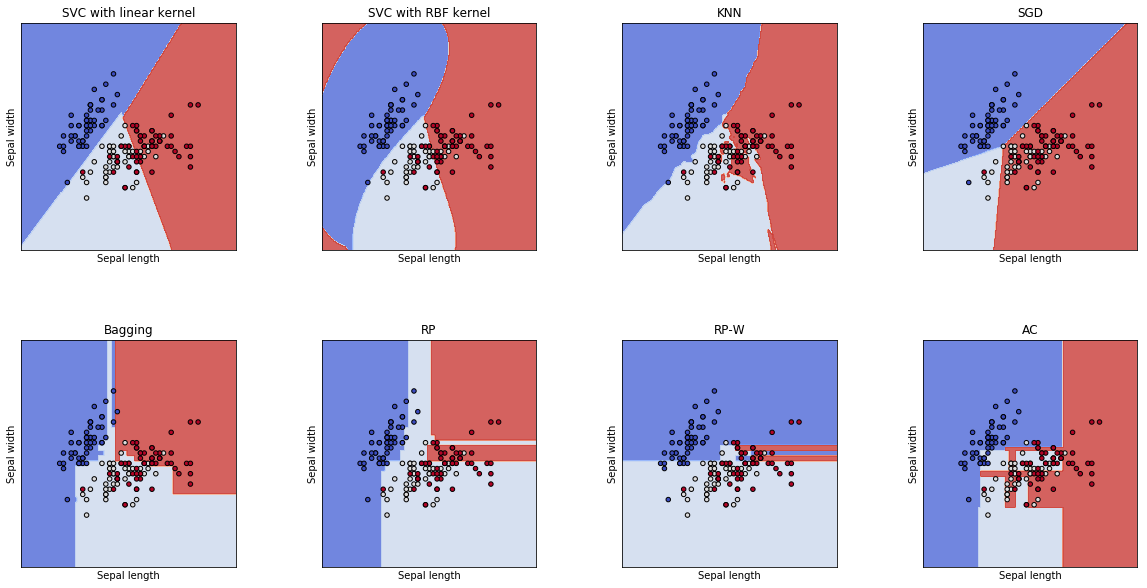

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    #print(clf)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

C = 1.0  # SVM regularization parameter
base =  AdaBoostClassifier()
        #KNeighborsClassifier()        
        #ExtraTreeClassifier()
        #DecisionTreeClassifier()
        #SGDClassifier() 
        #svm.SVC(kernel='linear', C=C, probability=True)
bagging = BaggingClassifier(base, max_samples=0.5, max_features=0.5, random_state=42)
rp = Vanilla_RP(base,max_samples=0.5, max_features=0.5, random_state=42)
rp_w = Vanilla_RP(base, max_samples=0.5, max_features=0.5, patcher='weighted', random_state=42)
ac = Adversarial_Cascade(base_estimator=base, num_adversaries_per_instance=10,
                         optim=False, 
                         parameters=None, oob=True, way='furthest')

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C), 
          KNeighborsClassifier(),
         pipeline,
         bagging,
         rp,
         rp_w,
         ac)

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'KNN',
         'SGD', 
         "Bagging",
         "RP",
         "RP-W",
         'AC')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    
    print("%s : %0.3f"% (title, 100*accuracy_score(y, clf.predict(X))))
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

In [24]:
class Adversarial_Cascade(BaseEstimator, ClassifierMixin):
    
    def __init__(self, base_estimator=KNeighborsClassifier(), n_estimators=10, acc_target=0.99,
                 num_adversaries_per_instance=4, way = 'prob', 
                 random_state=42, optim=False, parameters=None, metric='accuracy', oob=False, oob_size=0.1):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.acc_target = acc_target
        self.num_adversaries_per_instance = num_adversaries_per_instance
        self.way = way
        self.random_state = check_random_state(random_state)
        self.optim = optim
        self.oob = oob
        self.oob_size = 0.1
        self.X_oob = None
        self.y_oob = None
        if self.optim:
            self.parameters = parameters
        else:
            self.parameters = None
        self.scoring = get_scorer(metric)
        self.acc = 0
        self.ensemble = []
        self.selected_indices = []
    
    def fit(self, X, y):
        return self._fit(X, y)
    
    def _fit(self,X,y):
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        y = self._validate_y(y)
        if self.oob:
            X, self.X_oob, y, self.y_oob = train_test_split(X,y,test_size=0.1,stratify=y)
        n_samples, self.n_features_ = X.shape
        cur_X, cur_y = X, y
        self.selected_indices.append([i for i in xrange(X.shape[0])])
        flag_target = False
        for i_est in xrange(self.n_estimators):
            cur_mod = clone(self.base_estimator)
            if self.optim:
                grid_search = GridSearchCV(cur_mod, self.parameters, n_jobs=-1, verbose=1, refit=True)
                grid_search.fit(cur_X, cur_y)
                cur_mod = grid_search.best_estimator_
            else:
                cur_mod.fit(cur_X, cur_y)
            self.ensemble.append(cur_mod)
            cur_X, cur_y, flag_target = self._create_next_batch(X, y)
            if flag_target:
                break
            #print(cur_X.shape, cur_y.shape)
        print("%d ESTIMATORS -- %0.3f" % (len(self.ensemble), 100*accuracy_score(y, self.predict(X), normalize=True)))
        return self
    
    def _create_next_batch(self, X, y):
        if self.oob:
            preds = self.predict(self.X_oob)
            centroids = self.X_oob[preds != self.y_oob]
            centroids_ind = np.argwhere(preds != self.y_oob).reshape(-1,)
            cur_X = copy.deepcopy(self.X_oob[centroids_ind,:])
            cur_y = copy.deepcopy(self.y_oob[centroids_ind])
            str_target = "OOB SAMPLE"
            self.acc = accuracy_score(self.y_oob, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(self.X_oob.shape[0]))
        else:
            preds = self.predict(X)
            centroids = X[preds != y]
            centroids_ind = np.argwhere(preds!=y).reshape(-1,)
            cur_X = copy.deepcopy(X[centroids_ind,:])
            cur_y = copy.deepcopy(y[centroids_ind])
            str_target = "TRAIN SAMPLE"
            self.acc = accuracy_score(y, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(X.shape[0]))
        if  self.acc > self.acc_target:
            #return X, y, False
            #print("ACCURACY ON THE %s IS %0.3f" % (str_target, 100*(1-(centroids.shape[0])/float(X.shape[0]))))
            #print("STOPPING WITH %d BASE MODELS" % len(self.ensemble))
            return _, _,True
        probas = pairwise_distances(centroids, X)
        probas /= np.sum(probas, axis=1).reshape(-1,1)
        for i_centr in xrange(probas.shape[0]):
            # Make zero the probability that a same-class sample is picked
            cur_prob = copy.deepcopy(probas[i_centr,:])
            cur_prob[y[centroids_ind[i_centr]]==y]=0
            print(cur_prob.shape, np.sum(cur_prob))
            cur_prob /= np.sum(cur_prob)
            if self.way == 'prob':
                indices = self.random_state.choice([i for i in xrange(0, probas.shape[1])],
                                                   self.num_adversaries_per_instance, p=cur_prob)
            if self.way == 'furthest':
                indices = np.argsort(cur_prob)[::-1][:self.num_adversaries_per_instance]
            if self.way == 'closest':
                cur_prob[y[centroids_ind[i_centr]]==y]=1
                indices = np.argsort(cur_prob)[:self.num_adversaries_per_instance]
            indices = self._fix_class_indices(y, indices)
            #print(cur_X.shape, X[indices,:].shape)
            cur_X = np.vstack((cur_X, X[indices,:]))
            cur_y = np.append(cur_y, y[indices])
                #cur_y.extend(indices)

            #cur_X = np.delete(cur_X, 0, axis=0)
            #cur_y = y[cur_y]
        return cur_X, cur_y, False
        
    def _fix_class_indices(self, y, samples_indices):
        in_set = set(y[samples_indices])
        a = set(y).difference(in_set)
        for item in a:
           samples_indices= np.append(samples_indices, [np.where(y==item)[0][0]])
        return samples_indices    
    
    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        return y
    
    def predict(self, X):
        """Predict class for X.
        The predicted class of an input sample is computed as the class with
        the highest mean predicted probability. If base estimators do not
        implement a ``predict_proba`` method, then it resorts to voting.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        
        if hasattr(self.base_estimator, "predict_proba"):
            predicted_probability = self.predict_proba(X)
            return self.classes_.take((np.argmax(predicted_probability, axis=1)),
                                  axis=0)
        else:
            predicted_probability = np.zeros((X.shape[0],1), dtype=int)
            for i, ens in enumerate(self.ensemble):
                predicted_probability = np.hstack((predicted_probability, ens.predict(X).reshape(-1,1)))
            predicted_probability = np.delete(predicted_probability,0,axis=1)
            final_pred = []
            for sample in xrange(X.shape[0]):
                final_pred.append(most_common(predicted_probability[sample,:]))
                #votes = []
                #for i, mod_vote in predictions[sample,:]:
                #    votes.extend([predictions[sample, i] for j in xrange(int(self.acc[i]))])
                #final_pred = most_common(votes)
            return np.array(final_pred)   


    def predict_proba(self, X):
        """Predict class probabilities for X.
        The predicted class probabilities of an input sample is computed as
        the mean predicted class probabilities of the base estimators in the
        ensemble. If base estimators do not implement a ``predict_proba``
        method, then it resorts to voting and the predicted class probabilities
        of an input sample represents the proportion of estimators predicting
        each class.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        p : array of shape = [n_samples, n_classes]
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, "classes_")
        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1}."
                             "".format(self.n_features_, X.shape[1]))

        all_proba = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_proba += ens.predict_proba(X)
        all_proba /= self.n_estimators
        #print(all_proba.shape)
        #print(all_proba)
        #proba = np.sum(all_proba, axis=0) / self.n_estimators
        #print(proba.shape)
        #print(proba)
        return all_proba


    @if_delegate_has_method(delegate='base_estimator')
    def decision_function(self, X):
        """Average of the decision functions of the base classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The columns correspond
            to the classes in sorted order, as they appear in the attribute
            ``classes_``. Regression and binary classification are special
            cases with ``k == 1``, otherwise ``k==n_classes``.
        """
        check_is_fitted(self, "classes_")

        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1} "
                             "".format(self.n_features_, X.shape[1]))
        all_decisions = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_decisions += ens.predict_proba(X) 
        decisions = sum(all_decisions) / self.n_estimators

        return decisions
    
    def viz_fit(self, X, y):
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        y = self._validate_y(y)
        if self.oob:
            X, self.X_oob, y, self.y_oob = train_test_split(X,y,test_size=0.1,stratify=y)
        n_samples, self.n_features_ = X.shape
        cur_X, cur_y = X, y
        self.selected_indices.append([i for i in xrange(X.shape[0])])
        flag_target = False
        for i_est in xrange(self.n_estimators):
            cur_mod = clone(self.base_estimator)
            if self.optim:
                grid_search = GridSearchCV(cur_mod, self.parameters, n_jobs=-1, verbose=1, refit=True)
                grid_search.fit(cur_X, cur_y)
                cur_mod = grid_search.best_estimator_
            else:
                cur_mod.fit(cur_X, cur_y)
            self.ensemble.append(cur_mod)
            cur_X, cur_y, flag_target = self.viz_create_next_batch(X, y)
            if flag_target:
                break
            #print(cur_X.shape, cur_y.shape)
        print("%d ESTIMATORS -- %0.3f" % (len(self.ensemble), 100*accuracy_score(y, self.predict(X), normalize=True)))
        return self
    
    def viz_create_next_batch(self, X, y):
        if self.oob:
            preds = self.predict(self.X_oob)
            centroids = self.X_oob[preds != self.y_oob]
            centroids_ind = np.argwhere(preds != self.y_oob).reshape(-1,)
            cur_X = copy.deepcopy(self.X_oob[centroids_ind,:])
            cur_y = copy.deepcopy(self.y_oob[centroids_ind])
            str_target = "OOB SAMPLE"
            self.acc = accuracy_score(self.y_oob, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(self.X_oob.shape[0]))
        else:
            preds = self.predict(X)
            centroids = X[preds != y]
            centroids_ind = np.argwhere(preds!=y).reshape(-1,)
            cur_X = copy.deepcopy(X[centroids_ind,:])
            cur_y = copy.deepcopy(y[centroids_ind])
            str_target = "TRAIN SAMPLE"
            self.acc = accuracy_score(y, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(X.shape[0]))
        if  self.acc > self.acc_target:
            #return X, y, False
            #print("ACCURACY ON THE %s IS %0.3f" % (str_target, 100*(1-(centroids.shape[0])/float(X.shape[0]))))
            #print("STOPPING WITH %d BASE MODELS" % len(self.ensemble))
            return _, _,True
        probas = pairwise_distances(centroids, X)
        probas /= np.sum(probas, axis=1).reshape(-1,1)
        for i_centr in xrange(probas.shape[0]):
            # Make zero the probability that a same-class sample is picked
            cur_prob = copy.deepcopy(probas[i_centr,:])
            cur_prob[y[centroids_ind[i_centr]]==y]=0
            print(cur_prob.shape, np.sum(cur_prob))
            cur_prob /= np.sum(cur_prob)
            if self.way == 'prob':
                indices = self.random_state.choice([i for i in xrange(0, probas.shape[1])],
                                                   self.num_adversaries_per_instance, p=cur_prob)
            if self.way == 'furthest':
                indices = np.argsort(cur_prob)[::-1][:self.num_adversaries_per_instance]
            if self.way == 'closest':
                cur_prob[y[centroids_ind[i_centr]]==y]=1
                indices = np.argsort(cur_prob)[:self.num_adversaries_per_instance]
            indices = self._fix_class_indices(y, indices)
            
            #print(cur_X.shape, X[indices,:].shape)
            cur_X = np.vstack((cur_X, X[indices,:]))
            cur_y = np.append(cur_y, y[indices])
                #cur_y.extend(indices)

            #cur_X = np.delete(cur_X, 0, axis=0)
            #cur_y = y[cur_y]
        plot_selected_points(self, X,y, centroids_ind[i_centr], indices)
        cc = raw_input()
        if cc == 'q':
            exit
        return cur_X, cur_y, False
       

def most_common(lst):
    if isinstance(lst, np.ndarray):
        lst = lst.tolist()
    #print(lst, max(set(lst), key=lst.count)  )
    return max(set(lst), key=lst.count)

In [25]:
ac = Adversarial_Cascade(way='closest')
ac.viz_fit(X,y)

((150,), 0.749618053103047)
((150,), 0.7030413831294353)
((150,), 0.7333781004411971)
((150,), 0.7136448918796773)
((150,), 0.7601507426572564)
((150,), 0.7248006287638418)
((150,), 0.7984514622437389)
((150,), 0.7788390737899221)
((150,), 0.7627554359400545)
((150,), 0.7413436854865884)
((150,), 0.7984514622437389)
((150,), 0.7116112378255705)
((150,), 0.7778260248930959)
((150,), 0.5429528319909134)
((150,), 0.787109573424457)
((150,), 0.6303892204279558)
((150,), 0.6416119464106853)
((150,), 0.6886400659980525)
((150,), 0.5914062113872718)
((150,), 0.7464179471235344)
((150,), 0.7194995176572122)
((150,), 0.7181016216618819)
((150,), 0.8137265836816736)
((150,), 0.8150894085124069)
((150,), 0.6627973573931975)


NameError: global name 'plot_selected_points' is not defined

In [26]:
def plot_selected_points(clf, X, y, center_id, indices, s=100):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=s, edgecolors='grey')
    ax.scatter(X[center_id,0], X[center_id,1], s=s, edgecolors='green', facecolors='none')
    ax.scatter(X[indices,0], X[indices, 1], s=s, edgecolors='black', facecolors='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
    

AC : 64.000


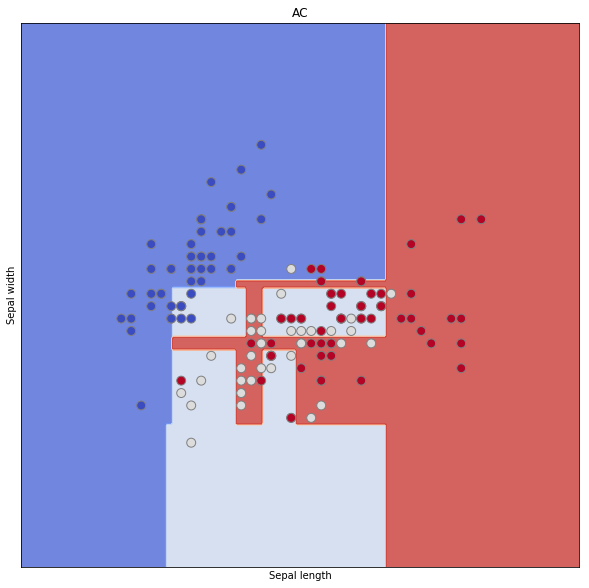

In [27]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
    
print("%s : %0.3f"% (title, 100*accuracy_score(y, clf.predict(X))))
plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=80, edgecolors='grey', facecolors='none')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
class Linear_Classifiers(BaseEstimator, ClassifierMixin):
    
    def __init__(self, base_estimator=KNeighborsClassifier(), n_estimators=10, acc_target=0.99,
                 num_adversaries_per_instance=4, way = 'prob', 
                 random_state=42, optim=False, parameters=None, metric='accuracy', oob=False, oob_size=0.1):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.acc_target = acc_target
        self.num_adversaries_per_instance = num_adversaries_per_instance
        self.way = way
        self.random_state = check_random_state(random_state)
        self.optim = optim
        self.oob = oob
        self.oob_size = 0.1
        self.X_oob = None
        self.y_oob = None
        if self.optim:
            self.parameters = parameters
        else:
            self.parameters = None
        self.scoring = get_scorer(metric)
        self.acc = 0
        self.ensemble = []
        self.selected_indices = []
    
    def fit(self, X, y):
        return self._fit(X, y)
    
    def _fit(self,X,y):
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        y = self._validate_y(y)
        if self.oob:
            X, self.X_oob, y, self.y_oob = train_test_split(X,y,test_size=0.1,stratify=y)
        n_samples, self.n_features_ = X.shape
        cur_X, cur_y = X, y
        self.selected_indices.append([i for i in xrange(X.shape[0])])
        flag_target = False
        for i_est in xrange(self.n_estimators):
            cur_mod = clone(self.base_estimator)
            if self.optim:
                grid_search = GridSearchCV(cur_mod, self.parameters, n_jobs=-1, verbose=1, refit=True)
                grid_search.fit(cur_X, cur_y)
                cur_mod = grid_search.best_estimator_
            else:
                cur_mod.fit(cur_X, cur_y)
            self.ensemble.append(cur_mod)
            cur_X, cur_y, flag_target = self._create_next_batch(X, y)
            if flag_target:
                break
            #print(cur_X.shape, cur_y.shape)
        print("%d ESTIMATORS -- %0.3f" % (len(self.ensemble), 100*accuracy_score(y, self.predict(X), normalize=True)))
        return self
    
    def _create_next_batch(self, X, y):
        if self.oob:
            preds = self.predict(self.X_oob)
            centroids = self.X_oob[preds != self.y_oob]
            centroids_ind = np.argwhere(preds != self.y_oob).reshape(-1,)
            cur_X = copy.deepcopy(self.X_oob[centroids_ind,:])
            cur_y = copy.deepcopy(self.y_oob[centroids_ind])
            str_target = "OOB SAMPLE"
            self.acc = accuracy_score(self.y_oob, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(self.X_oob.shape[0]))
        else:
            preds = self.predict(X)
            centroids = X[preds != y]
            centroids_ind = np.argwhere(preds!=y).reshape(-1,)
            cur_X = copy.deepcopy(X[centroids_ind,:])
            cur_y = copy.deepcopy(y[centroids_ind])
            str_target = "TRAIN SAMPLE"
            self.acc = accuracy_score(y, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(X.shape[0]))
        if  self.acc > self.acc_target:
            #return X, y, False
            #print("ACCURACY ON THE %s IS %0.3f" % (str_target, 100*(1-(centroids.shape[0])/float(X.shape[0]))))
            #print("STOPPING WITH %d BASE MODELS" % len(self.ensemble))
            return _, _,True
        probas = pairwise_distances(centroids, X)
        probas /= np.sum(probas, axis=1).reshape(-1,1)
        for i_centr in xrange(probas.shape[0]):
            # Make zero the probability that a same-class sample is picked
            cur_prob = copy.deepcopy(probas[i_centr,:])
            cur_prob[y[centroids_ind[i_centr]]==y]=0
            print(cur_prob.shape, np.sum(cur_prob))
            cur_prob /= np.sum(cur_prob)
            if self.way == 'prob':
                indices = self.random_state.choice([i for i in xrange(0, probas.shape[1])],
                                                   self.num_adversaries_per_instance, p=cur_prob)
            if self.way == 'furthest':
                indices = np.argsort(cur_prob)[::-1][:self.num_adversaries_per_instance]
            if self.way == 'closest':
                cur_prob[y[centroids_ind[i_centr]]==y]=1
                indices = np.argsort(cur_prob)[:self.num_adversaries_per_instance]
            indices = self._fix_class_indices(y, indices)
            #print(cur_X.shape, X[indices,:].shape)
            cur_X = np.vstack((cur_X, X[indices,:]))
            cur_y = np.append(cur_y, y[indices])
                #cur_y.extend(indices)

            #cur_X = np.delete(cur_X, 0, axis=0)
            #cur_y = y[cur_y]
        return cur_X, cur_y, False
        
    def _fix_class_indices(self, y, samples_indices):
        in_set = set(y[samples_indices])
        a = set(y).difference(in_set)
        for item in a:
           samples_indices= np.append(samples_indices, [np.where(y==item)[0][0]])
        return samples_indices    
    
    def _validate_y(self, y):
        y = column_or_1d(y, warn=True)
        check_classification_targets(y)
        self.classes_, y = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        return y
    
    def predict(self, X):
        """Predict class for X.
        The predicted class of an input sample is computed as the class with
        the highest mean predicted probability. If base estimators do not
        implement a ``predict_proba`` method, then it resorts to voting.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        
        if hasattr(self.base_estimator, "predict_proba"):
            predicted_probability = self.predict_proba(X)
            return self.classes_.take((np.argmax(predicted_probability, axis=1)),
                                  axis=0)
        else:
            predicted_probability = np.zeros((X.shape[0],1), dtype=int)
            for i, ens in enumerate(self.ensemble):
                predicted_probability = np.hstack((predicted_probability, ens.predict(X).reshape(-1,1)))
            predicted_probability = np.delete(predicted_probability,0,axis=1)
            final_pred = []
            for sample in xrange(X.shape[0]):
                final_pred.append(most_common(predicted_probability[sample,:]))
                #votes = []
                #for i, mod_vote in predictions[sample,:]:
                #    votes.extend([predictions[sample, i] for j in xrange(int(self.acc[i]))])
                #final_pred = most_common(votes)
            return np.array(final_pred)   


    def predict_proba(self, X):
        """Predict class probabilities for X.
        The predicted class probabilities of an input sample is computed as
        the mean predicted class probabilities of the base estimators in the
        ensemble. If base estimators do not implement a ``predict_proba``
        method, then it resorts to voting and the predicted class probabilities
        of an input sample represents the proportion of estimators predicting
        each class.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        p : array of shape = [n_samples, n_classes]
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, "classes_")
        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1}."
                             "".format(self.n_features_, X.shape[1]))

        all_proba = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_proba += ens.predict_proba(X)
        all_proba /= self.n_estimators
        #print(all_proba.shape)
        #print(all_proba)
        #proba = np.sum(all_proba, axis=0) / self.n_estimators
        #print(proba.shape)
        #print(proba)
        return all_proba


    @if_delegate_has_method(delegate='base_estimator')
    def decision_function(self, X):
        """Average of the decision functions of the base classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrices are accepted only if
            they are supported by the base estimator.
        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The columns correspond
            to the classes in sorted order, as they appear in the attribute
            ``classes_``. Regression and binary classification are special
            cases with ``k == 1``, otherwise ``k==n_classes``.
        """
        check_is_fitted(self, "classes_")

        # Check data
        X = check_array(
            X, accept_sparse=['csr', 'csc'], dtype=None,
            force_all_finite=False
        )

        if self.n_features_ != X.shape[1]:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {0} and "
                             "input n_features is {1} "
                             "".format(self.n_features_, X.shape[1]))
        all_decisions = np.zeros((X.shape[0], self.n_classes_))
        for i, ens in enumerate(self.ensemble):
            all_decisions += ens.predict_proba(X) 
        decisions = sum(all_decisions) / self.n_estimators

        return decisions
    
    def viz_fit(self, X, y):
        X, y = check_X_y(
            X, y, ['csr', 'csc'], dtype=None, force_all_finite=False,
            multi_output=True)
        y = self._validate_y(y)
        if self.oob:
            X, self.X_oob, y, self.y_oob = train_test_split(X,y,test_size=0.1,stratify=y)
        n_samples, self.n_features_ = X.shape
        cur_X, cur_y = X, y
        self.selected_indices.append([i for i in xrange(X.shape[0])])
        flag_target = False
        for i_est in xrange(self.n_estimators):
            cur_mod = clone(self.base_estimator)
            if self.optim:
                grid_search = GridSearchCV(cur_mod, self.parameters, n_jobs=-1, verbose=1, refit=True)
                grid_search.fit(cur_X, cur_y)
                cur_mod = grid_search.best_estimator_
            else:
                cur_mod.fit(cur_X, cur_y)
            self.ensemble.append(cur_mod)
            cur_X, cur_y, flag_target = self.viz_create_next_batch(X, y)
            if flag_target:
                break
            #print(cur_X.shape, cur_y.shape)
        print("%d ESTIMATORS -- %0.3f" % (len(self.ensemble), 100*accuracy_score(y, self.predict(X), normalize=True)))
        return self
    
    def viz_create_next_batch(self, X, y):
        if self.oob:
            preds = self.predict(self.X_oob)
            centroids = self.X_oob[preds != self.y_oob]
            centroids_ind = np.argwhere(preds != self.y_oob).reshape(-1,)
            cur_X = copy.deepcopy(self.X_oob[centroids_ind,:])
            cur_y = copy.deepcopy(self.y_oob[centroids_ind])
            str_target = "OOB SAMPLE"
            self.acc = accuracy_score(self.y_oob, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(self.X_oob.shape[0]))
        else:
            preds = self.predict(X)
            centroids = X[preds != y]
            centroids_ind = np.argwhere(preds!=y).reshape(-1,)
            cur_X = copy.deepcopy(X[centroids_ind,:])
            cur_y = copy.deepcopy(y[centroids_ind])
            str_target = "TRAIN SAMPLE"
            self.acc = accuracy_score(y, preds, normalize=True)
            #acc = (1-(centroids.shape[0])/float(X.shape[0]))
        if  self.acc > self.acc_target:
            #return X, y, False
            #print("ACCURACY ON THE %s IS %0.3f" % (str_target, 100*(1-(centroids.shape[0])/float(X.shape[0]))))
            #print("STOPPING WITH %d BASE MODELS" % len(self.ensemble))
            return _, _,True
        probas = pairwise_distances(centroids, X)
        probas /= np.sum(probas, axis=1).reshape(-1,1)
        for i_centr in xrange(probas.shape[0]):
            # Make zero the probability that a same-class sample is picked
            cur_prob = copy.deepcopy(probas[i_centr,:])
            cur_prob[y[centroids_ind[i_centr]]==y]=0
            print(cur_prob.shape, np.sum(cur_prob))
            cur_prob /= np.sum(cur_prob)
            if self.way == 'prob':
                indices = self.random_state.choice([i for i in xrange(0, probas.shape[1])],
                                                   self.num_adversaries_per_instance, p=cur_prob)
            if self.way == 'furthest':
                indices = np.argsort(cur_prob)[::-1][:self.num_adversaries_per_instance]
            if self.way == 'closest':
                cur_prob[y[centroids_ind[i_centr]]==y]=1
                indices = np.argsort(cur_prob)[:self.num_adversaries_per_instance]
            indices = self._fix_class_indices(y, indices)
            
            #print(cur_X.shape, X[indices,:].shape)
            cur_X = np.vstack((cur_X, X[indices,:]))
            cur_y = np.append(cur_y, y[indices])
                #cur_y.extend(indices)

            #cur_X = np.delete(cur_X, 0, axis=0)
            #cur_y = y[cur_y]
        plot_selected_points(self, X,y, centroids_ind[i_centr], indices)
        cc = raw_input()
        if cc == 'q':
            exit
        return cur_X, cur_y, False
       

def most_common(lst):
    if isinstance(lst, np.ndarray):
        lst = lst.tolist()
    #print(lst, max(set(lst), key=lst.count)  )
    return max(set(lst), key=lst.count)